# 1. Import libraries and Data


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create project path
path = r'/Users/gwynreniers/Documents/Instacart Analysis'
path

'/Users/gwynreniers/Documents/Instacart Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','full_instacart_data.pkl'))

In [5]:
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Frequency_flag,first_name,surname,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


## 2. Visual Analysis

### Exercise examples

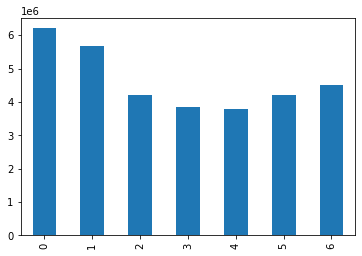

In [6]:
# Create a bar chart sorted on index (0-6)
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [19]:
# Creating histogram to show frequency of prices
df.loc[df['prices'] >100, 'prices'] = np.nan

In [20]:
df['prices'].max()

25.0

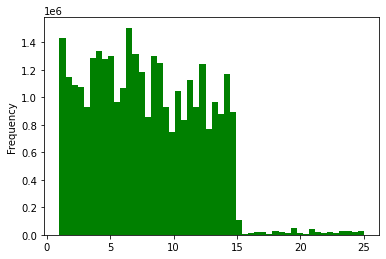

In [25]:
hist = df['prices'].plot.hist(bins = 50, color = 'green')

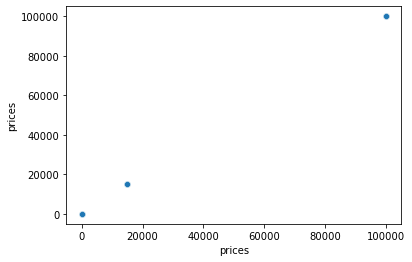

In [8]:
# Creating scatterplot
scatter1 = sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [26]:
# Create a line chart using subset

In [27]:
# Create a list holding true/false values to test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [28]:
# dev is the boolean list of true/false
dev

array([False,  True, False, ...,  True,  True,  True])

In [29]:
# Store 70% of the sample in data frame: big
big = df[dev]

In [36]:
# Store 30% of the sample in data frame: small
small = df[~dev]

In [37]:
# Checking length is correct
len(big)+len(small)

32404859

In [38]:
# Create new data frame from columns needed for line chart
df_small = small[['orders_day_of_week','prices']]

In [39]:
#Check output
df_small

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,2,10.7
32404842,6,10.7
32404843,0,10.7
32404849,1,10.7


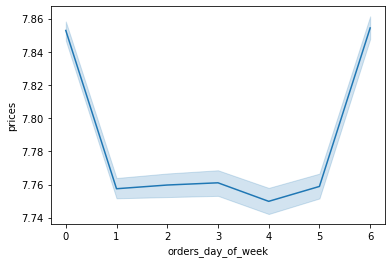

In [41]:
# Create line chart using the smaller 30% sample.
line = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

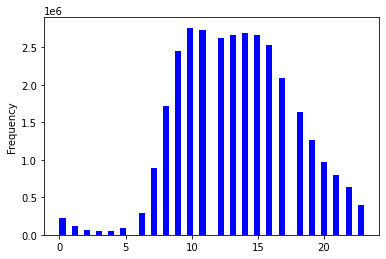

In [43]:
# Create a histogram of the “order_hour_of_day” column

hist2 = df['order_hour_of_day'].plot.hist(bins = 50, color = 'blue')

#### Orders begin to increase around 7 am, peaking around 10 am. Most orders are placed 9:30am-2:30pm.  Orders begin to taper off after 3pm, declining steeply after 8pm and remaining low from 8am until 5am.

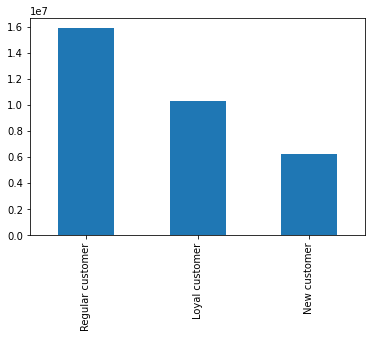

In [44]:
# Create a bar chart from the “loyalty_flag” column.
bar = df['loyalty_flag'].value_counts().plot.bar()

#### The largest customer base is "regular customers", those who place between 10 and 40 orders.

In [46]:
# Creating new data frame with just the columns needed for the line chart
df_small_2 = small[['order_hour_of_day','prices']]

In [47]:
df_small_2

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


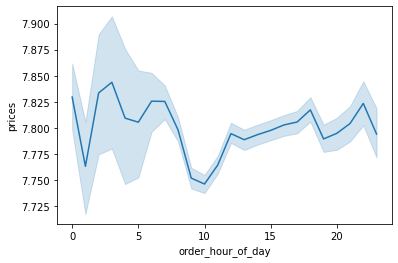

In [48]:
# Create line chart on 30% of df sample
line_2 = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

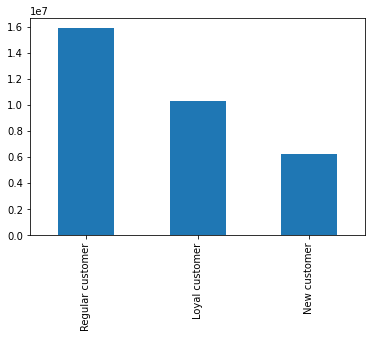

In [49]:
# Create a bar chart from the “loyalty_flag” column.
bar = df['loyalty_flag'].value_counts().plot.bar()

While there are fewer orders placed in the early morning, these orders are of higher value. The large amount of orders that are being placed in the middle of the day are of lesser value. 
Higher frequency order times 10am- 2:30pm have lower expenditure than
lower frequency order times especially in the morning 12:00am - 7:00am which have higher exependiture.

#### Determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [51]:
# Creating new data frame with just the columns needed for the line chart
df_small_3 = small[['age','no_of_dependants']]

In [53]:
df_small_3

,age,no_of_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


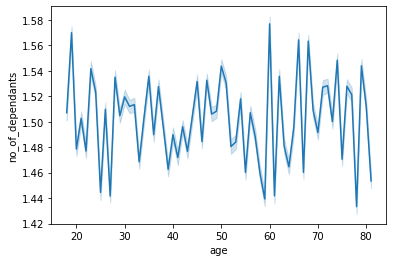

In [54]:
line_3 = sns.lineplot(data = df_small_3, x = 'age',y = 'no_of_dependants')

In [55]:
df_small_3['no_of_dependants'].describe()

count    9.721098e+06
mean     1.502105e+00
std      1.118703e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: no_of_dependants, dtype: float64

#### There doesn't appear to be any connection/correlationn between age and number of dependants for Instacart customers.

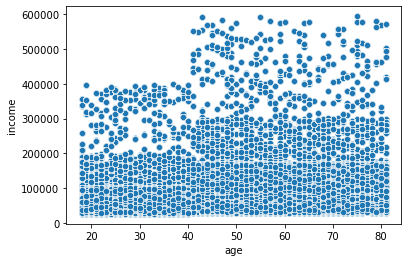

In [56]:
# Explore whether there’s a connection between age and spending power (income).

scatter_2 = sns.scatterplot(x = 'age', y = 'income', data = df)

#### This shows several relationships between age and spending power.
1. The majority of customers aged 20-40 have an income of up to 200,000 USD
2. Income increases to 300,000 USD in the 40+ age group, but the majority of this age group still remain in the 200,000 UDS and under bracket.
3. The 40+ age group have the highest spending power.
4. However there are some customers in the under 40 age group that have a higher spending power than the majority of 40+ group.

# 3. Export data

In [59]:
# Exporting charts to folder as image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [60]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_exp.png'))

In [61]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'exp_hour_of_day.png'))

In [62]:
scatter1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'))

In [63]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

In [64]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [65]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

In [66]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_no_of_dependants.png'))

In [67]:
scatter_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income.png'))